In [51]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

resolution=28*28=784 pixels 
total 70k datas 

In [52]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [53]:
x_test.shape 

(10000, 28, 28)

In [54]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

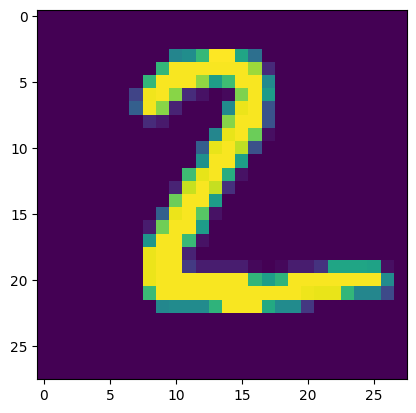

In [55]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])

In [56]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [57]:
x_train = x_train/255
x_test = x_test/255

In [58]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [59]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')


In [62]:
history=model.fit(x_train,y_train,epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2843 - val_loss: 0.1449
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1166 - val_loss: 0.1264
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0811 - val_loss: 0.1100
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0613 - val_loss: 0.1082
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0482 - val_loss: 0.0858
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0372 - val_loss: 0.0855
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0307 - val_loss: 0.0969
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0259 - val_loss: 0.0936
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0200 - val_loss: 0.1248
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.021

In [63]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [64]:
y_pred=y_prob.argmax(axis=1)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9755

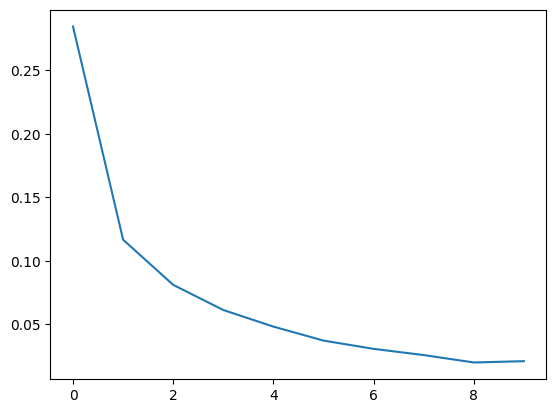

In [66]:
plt.plot(history.history['loss'])

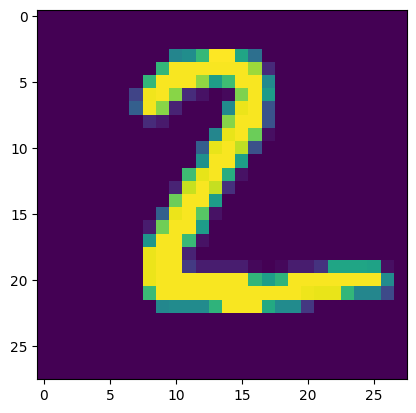

In [68]:
plt.imshow(x_test[1])

In [70]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 29ms/step


array([7], dtype=int64)